In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Análisis de Tendencias de Goles en el Tiempo

Para iniciar el resumen del análisis, se comienza con la importación de los conjuntos de datos mediante archivos CSV. Posteriormente, se exploran las primeras gráficas que proporcionan información valiosa sobre las tendencias de goles a lo largo de los años.

## Importación de Datos

Se realiza la importación de datos desde archivos CSV para llevar a cabo el análisis. Estos archivos contienen información relevante sobre competiciones y jugadores destacados, proporcionando una base sólida para el estudio.

## Gráficas de Tendencia de Goles

A continuación, se presentan las primeras gráficas que exploran las tendencias de goles a lo largo de los años:

### Tendencia número de partidos por Año

Se presenta una gráfica que muestra una evolucion de los partidos, esto ayuda a poner contexto en las siguente gráfica con el número de goles

### Tendencia de Goles Totales por Año

Se genera una gráfica que muestra la evolución de los goles totales anuales en las competiciones seleccionadas. Esta visualización permite identificar patrones, picos y valles en la producción total de goles a lo largo del tiempo.




### Tendencia de Goles por Partido por Año

Otra gráfica se enfoca en la distribución de goles por partido a lo largo de los años. Este análisis proporciona información sobre la intensidad goleadora en cada competición y cómo ha variado a lo largo del tiempo.

Estas gráficas iniciales proporcionan una visión general de cómo ha evolucionado la producción de goles en las competiciones seleccionadas a lo largo de los años y la distribución de goles por partido.


In [3]:
ds = pd.read_csv("./data/results.csv")
df = pd.read_csv("./data/goalscorers.csv")

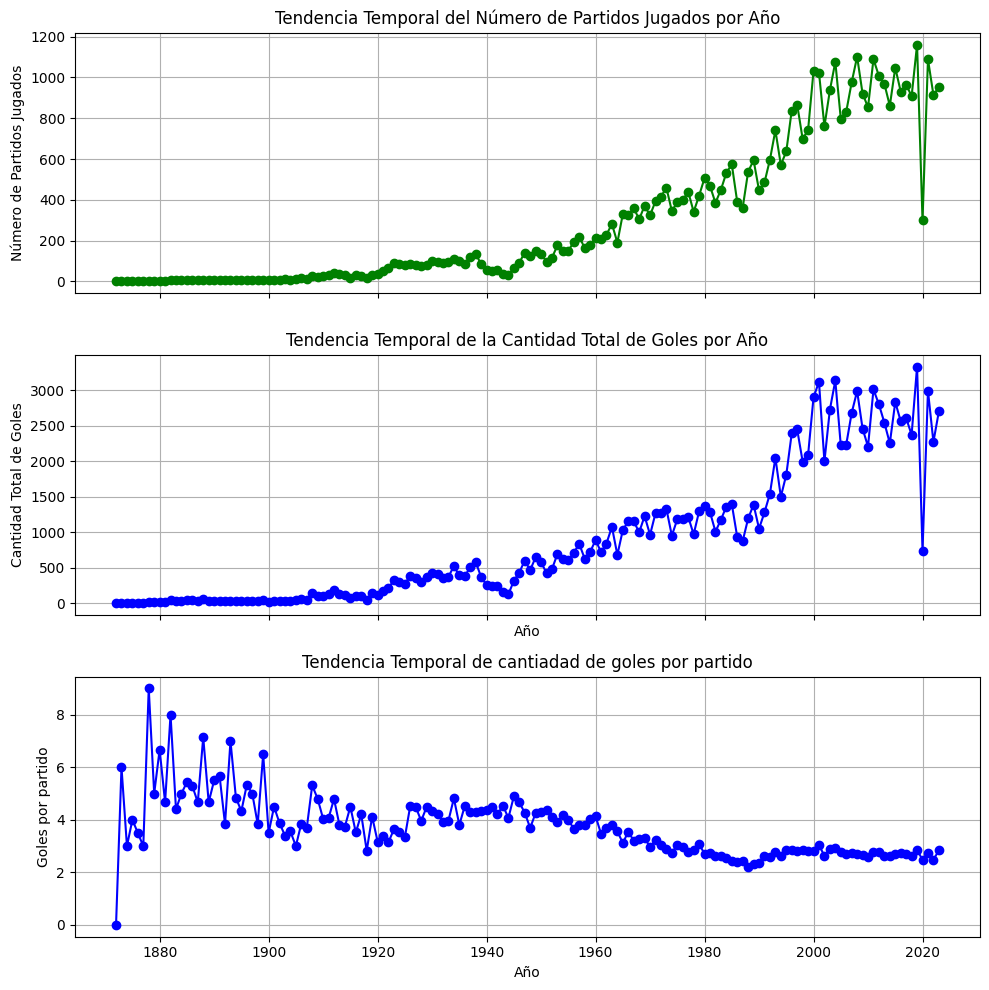

In [4]:
'''Pregunta 2: 2. **Tendencias temporales:**
   - ¿Cómo ha cambiado la cantidad de goles a lo largo de los años?
   - ¿Existen períodos específicos con más o menos goles? '''



# Convertir la columna 'date' a tipo datetime
ds['date'] = pd.to_datetime(ds['date'])

# Obtener el número de partidos jugados por año
matches_per_year = ds.groupby(ds['date'].dt.year).size().reset_index(name='matches_played')

# Agrupar por año y sumar la cantidad total de goles
goals_per_year = ds.groupby(ds['date'].dt.year)['home_score'].sum().reset_index()
goals_away = ds.groupby(ds['date'].dt.year)['away_score'].sum().reset_index()
goals_per_year['total_goals'] = goals_per_year['home_score'] + goals_away['away_score']

# Crear una figura con dos subgráficos (uno encima del otro)
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 10), sharex=True)

# Gráfico de tendencia temporal del número de partidos jugados
ax1.plot(matches_per_year['date'], matches_per_year['matches_played'], marker='o', color='green')
ax1.set_title('Tendencia Temporal del Número de Partidos Jugados por Año')
ax1.set_ylabel('Número de Partidos Jugados')
ax1.grid(True)

# Gráfico de tendencia temporal de la cantidad total de goles
ax2.plot(goals_per_year['date'], goals_per_year['total_goals'], marker='o', color='blue')
ax2.set_title('Tendencia Temporal de la Cantidad Total de Goles por Año')
ax2.set_xlabel('Año')
ax2.set_ylabel('Cantidad Total de Goles')
ax2.grid(True)


goles_partido = goals_per_year['total_goals']/matches_per_year['matches_played']
ax3.plot(goals_per_year['date'], goles_partido , marker='o', color='blue')
ax3.set_title('Tendencia Temporal de cantiadad de goles por partido')
ax3.set_xlabel('Año')
ax3.set_ylabel('Goles por partido')
ax3.grid(True)
# Ajustar el espaciado entre los subgráficos
plt.tight_layout()

# Mostrar la figura
plt.show()


# Creación de DataFrame para Competiciones Destacadas

En el proceso de análisis de datos, se ha generado un nuevo DataFrame focalizado en competiciones que se consideran destacadas a nivel mundial y continental. Este DataFrame, denominado `competiciones_destacadas`, incluye las siguientes competiciones:

- **FIFA World Cup**: La prestigiosa Copa del Mundo organizada por la FIFA.
- **FIFA World Cup qualification**: Las eliminatorias para la Copa del Mundo FIFA.
- **UEFA Euro**: El campeonato de selecciones nacionales de la UEFA.
- **UEFA Euro qualification**: Las eliminatorias para la UEFA Euro.
- **Copa América**: El torneo de selecciones sudamericanas.
- **Copa América qualification**: Las eliminatorias para la Copa América.
- **Gold Cup**: El torneo de selecciones de América del Norte, América Central y el Caribe.
- **Gold Cup qualification**: Las eliminatorias para la Gold Cup.
- **African Cup of Nations**: El campeonato de selecciones nacionales africanas.
- **African Cup of Nations qualification**: Las eliminatorias para la Copa Africana de Naciones.
- **African Nations Championship**: Torneo de selecciones nacionales africanas con jugadores que juegan en sus propias ligas.
- **African Nations Championship qualification**: Las eliminatorias para el African Nations Championship.
- **AFC Asian Cup**: El torneo de selecciones nacionales de la Confederación Asiática de Fútbol.
- **AFC Asian Cup qualification**: Las eliminatorias para la AFC Asian Cup.
- **Oceania Nations Cup**: El campeonato de selecciones de la OFC (Confederación de Fútbol de Oceanía).
- **Oceania Nations Cup qualification**: Las eliminatorias para la Oceania Nations Cup.
- **Confederations Cup**: Torneo internacional de selecciones, generalmente considerado como preparación para la Copa del Mundo.
- **COSAFA Cup**: Torneo de selecciones del Consejo de Asociaciones de Fútbol del Sur de África.
- **COSAFA Cup qualification**: Las eliminatorias para la COSAFA Cup.
- **CFU Caribbean Cup**: Torneo de selecciones del Caribe.
- **CFU Caribbean Cup qualification**: Las eliminatorias para la CFU Caribbean Cup.
- **Gulf Cup**: Torneo de selecciones del Golfo Pérsico.

Este DataFrame proporciona una base sólida para analizar y comparar datos específicos de estas competiciones destacadas a lo largo del tiempo.


In [5]:
competiciones_destacadas = [
    'FIFA World Cup', 'FIFA World Cup qualification', 'UEFA Euro', 'UEFA Euro qualification', 'Copa América',
      'Copa América qualification', 'Gold Cup', 'Gold Cup qualification', 'African Cup of Nations', 'African Cup of Nations qualification', 
      'African Nations Championship', 'African Nations Championship qualification', 'AFC Asian Cup', 'AFC Asian Cup qualification', 'Oceania Nations Cup',
        'Oceania Nations Cup qualification', 'Confederations Cup', 'COSAFA Cup', 'COSAFA Cup qualification', 'CFU Caribbean Cup', 'CFU Caribbean Cup qualification', 'Gulf Cup'
]




In [6]:
#Creo un nuevo df solo con las competiciones descadas
df_ci = ds[ds['tournament'].isin(competiciones_destacadas)]


# Análisis de Rendimiento de Equipos Destacados

En esta fase del análisis, se busca evaluar el rendimiento de los equipos en las competiciones destacadas mediante la generación de una gráfica informativa. El enfoque principal se centra en calcular y comparar el promedio de goles anotados por los equipos en tres contextos: como local, como visitante y en general. Se establece un criterio adicional, considerando únicamente a aquellos equipos que han participado en más de 50 partidos en las competiciones seleccionadas.

## Gráfica de Promedio de Goles por Equipos Destacados

Se presenta una gráfica comparativa que muestra el promedio de goles para cada equipo destacado en los siguientes contextos:

- **Local**: Promedio de goles anotados cuando el equipo juega como local.
- **Visitante**: Promedio de goles anotados cuando el equipo juega como visitante.
- **General**: Promedio total de goles, combinando las anotaciones como local y visitante.

Esta visualización se ha diseñado para proporcionar insights sobre el rendimiento goleador de los equipos, permitiendo una comparación entre distintos aspectos de su desempeño. La restricción de incluir solo a aquellos equipos con más de 50 partidos garantiza una evaluación significativa y robusta de su historial en las competiciones destacadas.

La gráfica resultante permitirá identificar visualmente a los equipos considerados como "mejores" y "peores" en términos de producción goleadora en el contexto de las competiciones seleccionadas.


C:\Users\adrif\AppData\Local\Temp\ipykernel_20336\1568894825.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(data['team'], rotation=45, ha='right')
C:\Users\adrif\AppData\Local\Temp\ipykernel_20336\1568894825.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(data['team'], rotation=45, ha='right')
C:\Users\adrif\AppData\Local\Temp\ipykernel_20336\1568894825.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(data['team'], rotation=45, ha='right')
C:\Users\adrif\AppData\Local\Temp\ipykernel_20336\1568894825.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(data['team'], rotat

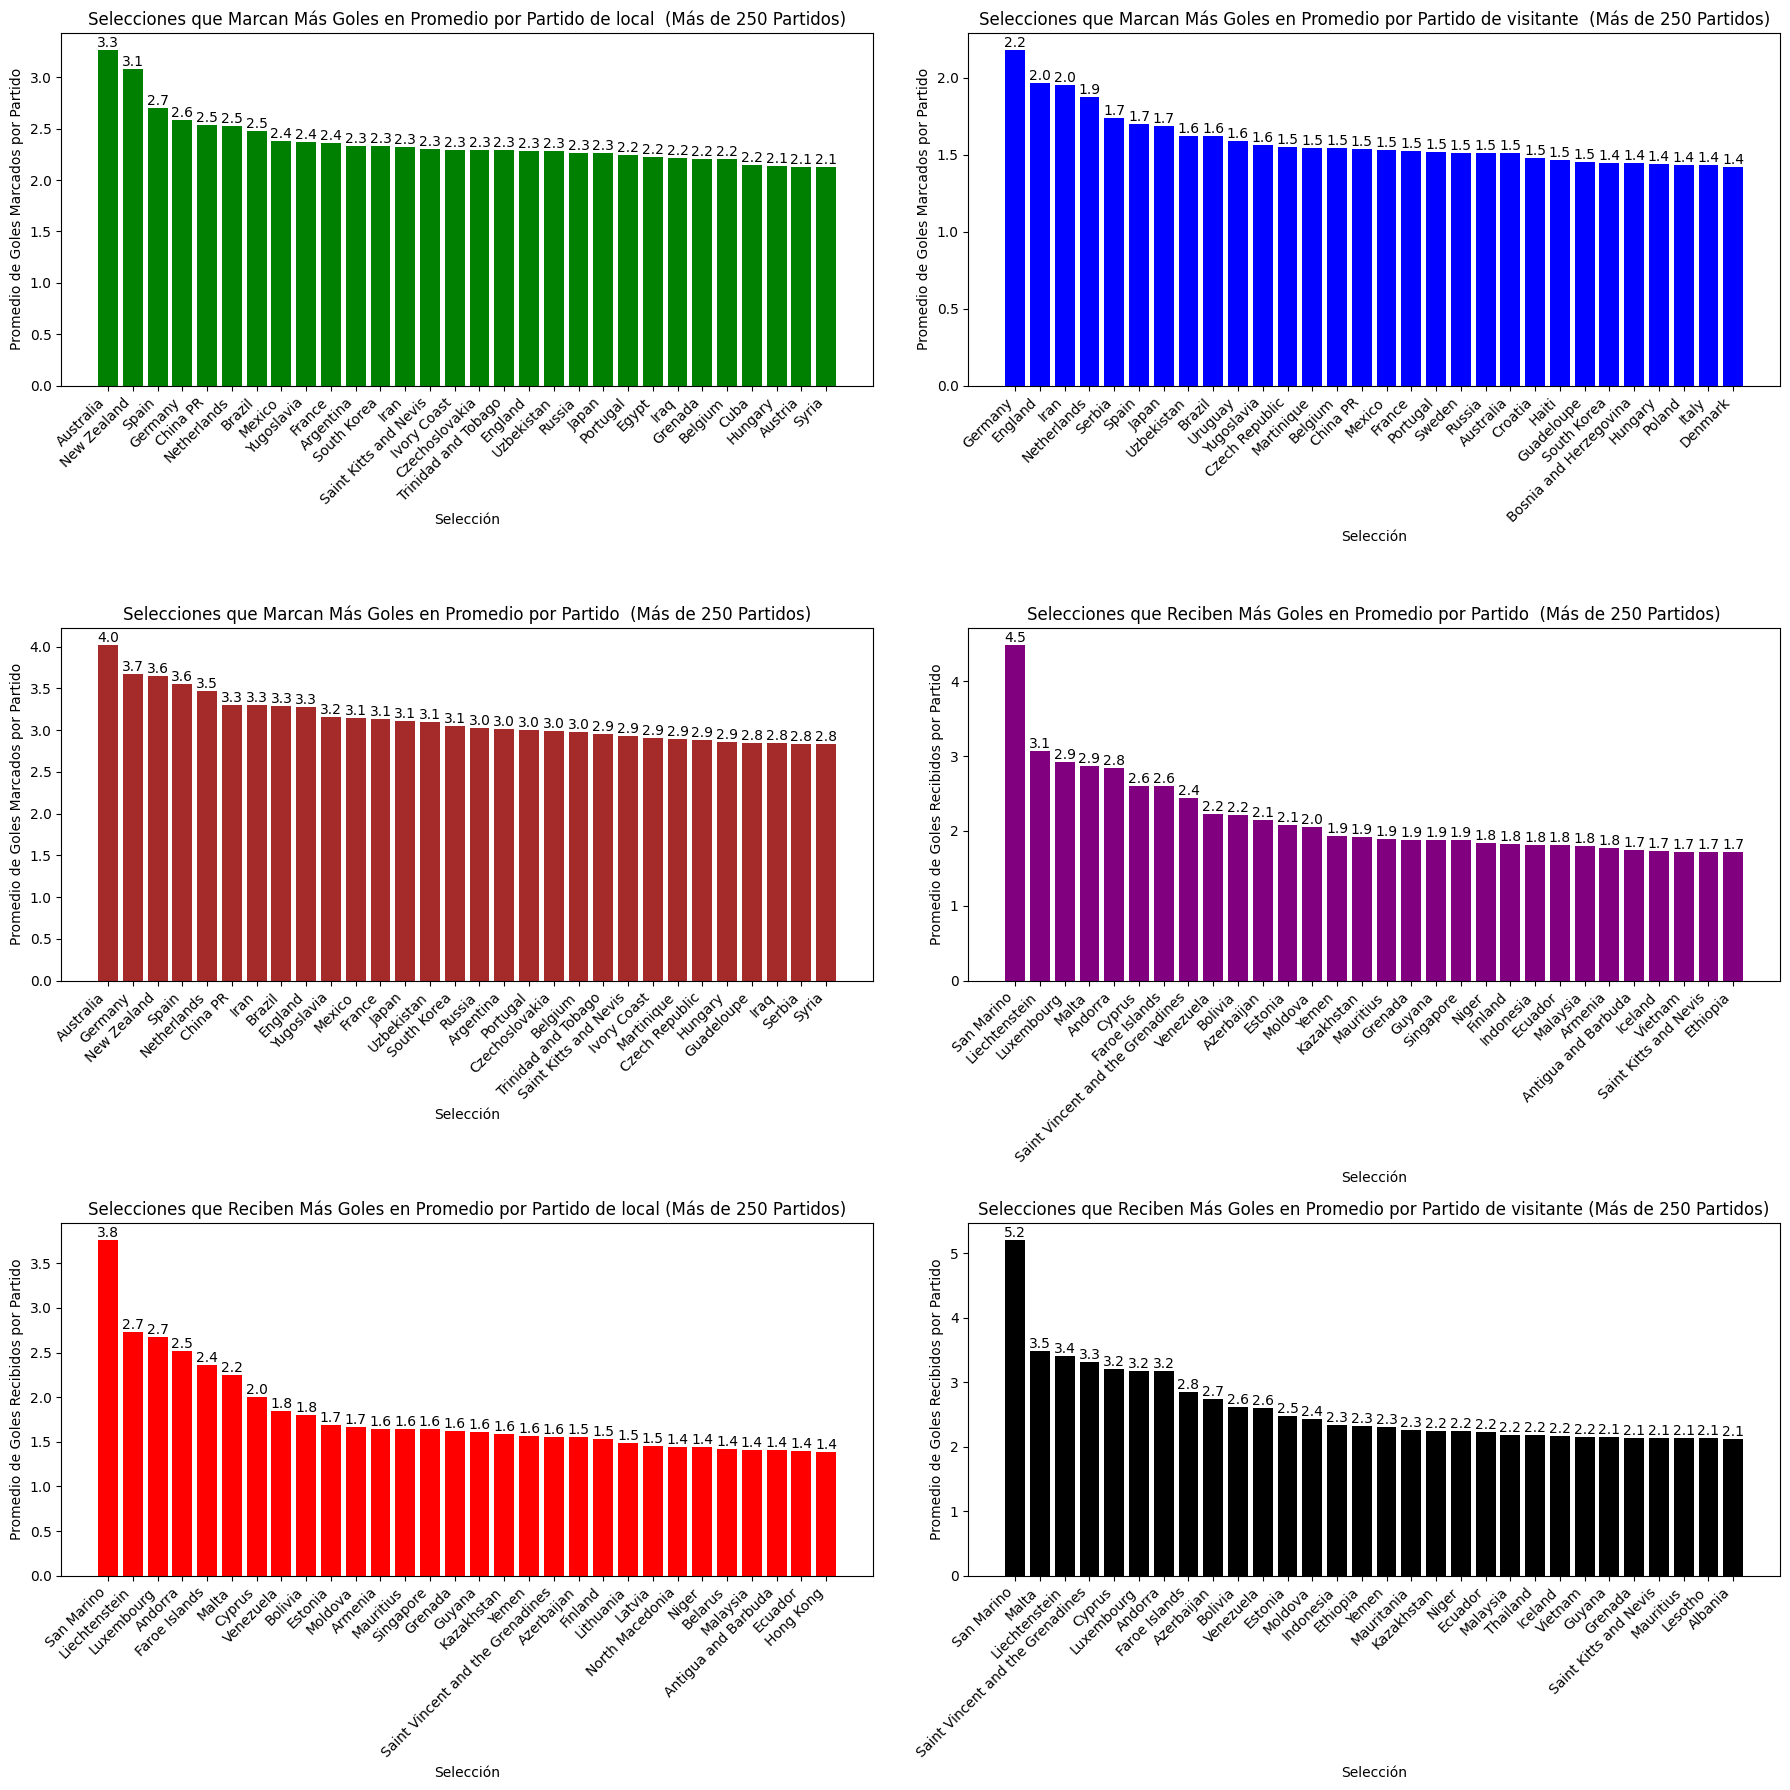

In [17]:
# Función para crear gráficos de barras
def create_bar_chart(ax, data, title, x_label, y_label, color):
    bars = ax.bar(data['team'], data['average_goals'], color=color)
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_xticklabels(data['team'], rotation=45, ha='right')

    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 1), ha='center', va='bottom')

# Filtrar equipos con más de 50 partidos
teams_with_over_50_matches_local = df_ci['home_team'].value_counts()[df_ci['home_team'].value_counts() > 50].index
filtered_df_ci_local = df_ci[df_ci['home_team'].isin(teams_with_over_50_matches_local)]
teams_with_over_50_matches_visitante = df_ci['away_team'].value_counts()[df_ci['away_team'].value_counts() > 50].index
filtered_df_ci_visitante = df_ci[df_ci['away_team'].isin(teams_with_over_50_matches_local)]

# Calcular el promedio de goles marcados por partido para cada selección de local
average_goals_scored_home = filtered_df_ci_local.groupby('home_team')['home_score'].mean().reset_index()
average_goals_scored_home.columns = ['team', 'average_goals']
average_goals_scored_away = filtered_df_ci_visitante.groupby('away_team')['away_score'].mean().reset_index()
average_goals_scored_away.columns = ['team', 'average_goals']
total_goals_scored = (average_goals_scored_home["average_goals"] + average_goals_scored_away["average_goals"]/2)
average_total_goles_marcados = pd.DataFrame({'team': average_goals_scored_away['team'], 'average_goals': total_goals_scored})

# Calcular el promedio de goles recibidos por partido para cada selección de local
average_goals_received_local = filtered_df_ci_local.groupby('home_team')['away_score'].mean().reset_index()
average_goals_received_local.columns = ['team', 'average_goals']
average_goals_received_visitante = filtered_df_ci_visitante.groupby('away_team')['home_score'].mean().reset_index()
average_goals_received_visitante.columns = ['team', 'average_goals']
average_total_goles_recibidos = pd.DataFrame({'team': average_goals_received_visitante['team'], 
                                              'average_goals': (average_goals_received_visitante['average_goals'] + average_goals_received_local['average_goals'])/2})

# Crear subplots usando ax
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18, 18))

# Gráficos de barras para goles marcados de local y visitante
create_bar_chart(axes[0, 0], average_goals_scored_home.sort_values(by= "average_goals",ascending=False).head(30), 
                 'Selecciones que Marcan Más Goles en Promedio por Partido de local  (Más de 250 Partidos)', 'Selección', 'Promedio de Goles Marcados por Partido', 'green')
create_bar_chart(axes[0, 1], average_goals_scored_away.sort_values(by= "average_goals",ascending=False).head(30), 
                 'Selecciones que Marcan Más Goles en Promedio por Partido de visitante  (Más de 250 Partidos)', 'Selección', 'Promedio de Goles Marcados por Partido', 'blue')

# Gráfico de barras para goles marcados totales
create_bar_chart(axes[1, 0], average_total_goles_marcados.sort_values(by='average_goals', ascending=False).head(30), 
                 'Selecciones que Marcan Más Goles en Promedio por Partido  (Más de 250 Partidos)', 'Selección', 'Promedio de Goles Marcados por Partido', 'brown')

# Gráficos de barras para goles recibidos de local y visitante
create_bar_chart(axes[2, 0], average_goals_received_local.sort_values(by='average_goals', ascending=False).head(30), 
                 'Selecciones que Reciben Más Goles en Promedio por Partido de local (Más de 250 Partidos)', 'Selección', 'Promedio de Goles Recibidos por Partido', 'red')
create_bar_chart(axes[2, 1], average_goals_received_visitante.sort_values(by='average_goals', ascending=False).head(30),
                  'Selecciones que Reciben Más Goles en Promedio por Partido de visitante (Más de 250 Partidos)', 'Selección', 'Promedio de Goles Recibidos por Partido', 'black')

# Gráfico de barras para goles recibidos totales
create_bar_chart(axes[1, 1], average_total_goles_recibidos.sort_values(by='average_goals', ascending=False).head(30), 
                 'Selecciones que Reciben Más Goles en Promedio por Partido  (Más de 250 Partidos)', 'Selección', 'Promedio de Goles Recibidos por Partido', 'purple')

plt.tight_layout()
plt.show()


# Destacando Partidos con Mayor Producción y Mayor Diferencia de Goles

En esta etapa del análisis, se enriquece el DataFrame previamente creado con dos nuevas columnas: una que registra los partidos con mayor cantidad de goles anotados y otra que destaca los partidos con la mayor diferencia de goles. Estas columnas proporcionan una visión clara de los resultados más abultados y las mayores goleadas en los torneos seleccionados.

## Creación de Columnas de Partidos Destacados

Se añaden las columnas siguientes al DataFrame:

- `partido_mas_goles`: Registra los partidos con mayor cantidad de goles anotados.
- `partido_mayor_diferencia`: Destaca los partidos con la mayor diferencia de goles.


## Visualización de los Partidos Destacados

A continuación, se presenta una tabla que destaca los 10 partidos con mayor diferencia de goles y los 3 partidos con la mayor diferencia de goles de cada torneo.

Esta implementación proporciona una rápida identificación de los partidos más destacados en términos de producción goleadora y diferencia de goles, permitiendo una visión detallada de los resultados más abultados y las mayores goleadas en los torneos seleccionados.



In [8]:
df_ci["Total_goles"] = df_ci["home_score"] + df_ci["away_score"]
df_ci["Diferencia"] = df_ci["home_score"] - df_ci["away_score"]


C:\Users\adrif\AppData\Local\Temp\ipykernel_20336\1707212895.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ci["Total_goles"] = df_ci["home_score"] + df_ci["away_score"]
C:\Users\adrif\AppData\Local\Temp\ipykernel_20336\1707212895.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ci["Diferencia"] = df_ci["home_score"] - df_ci["away_score"]


In [9]:
top10_partidos = df_ci.nlargest(10, 'Total_goles')


In [10]:
def top3_partidos_por_competicion(group):
    return group.nlargest(2, 'Diferencia')

# Aplicar la función a cada grupo de la competición
top3_por_competicion = df_ci.groupby('tournament', group_keys=False).apply(top3_partidos_por_competicion)



# Análisis de los jugadores

En la continuación del análisis, se procede a importar nuevamente los DataFrames pertinentes, facilitando así la manipulación de datos. El primer paso seria hacer un merge de los dos df para completar el df de los goalscorers

## Fusión de DataFrames

Para enlazar la información sobre jugadores con los detalles de los partidos, se ejecuta un proceso de fusión. Este proceso incorpora las fechas y los equipos involucrados en cada partido, adicionando al DataFrame de goleadores la columna 'tournament', que hasta el momento solo se encuentra en el otro DataFrame.

Este paso permite consolidar información clave sobre los torneos en los que cada jugador anotó goles, estableciendo una conexión más completa entre los datos de jugadores y los detalles de los partidos.


In [11]:
df2 = pd.read_csv("./data/results.csv")
df1 = pd.read_csv("./data/goalscorers.csv")

In [12]:
df1['date'] = pd.to_datetime(df1['date'])
df2['date'] = pd.to_datetime(df2['date'])

# Merge basado en fechas y equipos locales y visitantes
merged_df = pd.merge(df1, df2, 
                     left_on=['date', 'home_team', 'away_team'], 
                     right_on=['date', 'home_team', 'away_team'],
                     how='left')

# Puedes seleccionar las columnas relevantes según tus necesidades
# Por ejemplo, si solo quieres la columna de la competición, puedes hacer:
merged_df = merged_df[['date', 'home_team', 'away_team',"team", 'scorer', 'minute', 'own_goal', 'penalty', 'tournament']]


In [13]:
competiciones_destacadas = [
    'FIFA World Cup', 'FIFA World Cup qualification', 'UEFA Euro', 'UEFA Euro qualification', 'Copa América', 'Copa América qualification', 'Gold Cup', 'Gold Cup qualification', 'African Cup of Nations', 'African Cup of Nations qualification', 'African Nations Championship', 'African Nations Championship qualification', 'AFC Asian Cup', 'AFC Asian Cup qualification', 'Oceania Nations Cup', 'Oceania Nations Cup qualification', 'Confederations Cup', 'COSAFA Cup', 'COSAFA Cup qualification', 'CFU Caribbean Cup', 'CFU Caribbean Cup qualification', 'Gulf Cup'
]
competiciones_destacadas

df = merged_df[merged_df['tournament'].isin(competiciones_destacadas)]



# Observación de los máximos goleadores de los principales torneos

## Enfoque en los Goleadores Destacados

Se exploran las estadísticas de los máximos goleadores para comprender quiénes son los jugadores más destacados en términos de producción goleadora en las competiciones seleccionadas. Esta observación inicial proporciona una visión clara de los nombres prominentes y de su contribución al ámbito goleador en el contexto de los torneos analizados.

Este análisis preliminar sienta las bases para investigaciones más detalladas sobre el rendimiento individual de los jugadores, explorando factores como la consistencia, la distribución de goles a lo largo del tiempo y su impacto en el desempeño general de sus equipos.

##### Top 10 goleadores de todos los tiempos

##### Top 20 maximos goleadores de fase final de torneos mundial o contiental
Diferenciando Mundial con el resto de la competiciones al tratarse de la mas prestigiosa

In [14]:
# Obtener el top 10 histórico de goleadores con información del país
top10_scorers = df.groupby(['scorer', 'team']).size().reset_index(name='goals')
top10_scorers = top10_scorers.sort_values('goals', ascending=False).head(10)

# Mostrar los resultados
print(top10_scorers)

                   scorer                 team  goals
2541    Cristiano Ronaldo             Portugal    101
11106  Robert Lewandowski               Poland     59
7741         Lionel Messi            Argentina     54
4972           Harry Kane              England     52
11294       Romelu Lukaku              Belgium     50
733              Ali Daei                 Iran     49
9021       Miroslav Klose              Germany     48
2100          Carlos Ruiz            Guatemala     47
7909          Luis Suárez              Uruguay     46
11078        Robbie Keane  Republic of Ireland     44


In [15]:
competiciones_destacadas = [
    'FIFA World Cup',  'UEFA Euro',  'Copa América',  'Gold Cup',  'African Cup of Nations', 
      'African Nations Championship',  'AFC Asian Cup',  'Oceania Nations Cup',  'Confederations Cup', 'COSAFA Cup', 'CFU Caribbean Cup', 'Gulf Cup']
df_final = df[df['tournament'].isin(competiciones_destacadas)]

In [16]:
# Crear una nueva columna 'competicion' para distinguir entre Mundial y otras competiciones
df_final['competicion'] = np.where(df_final['tournament'].str.contains('World Cup'), 'Mundial', 'Otras Competiciones')

# Obtener el top 20 de goleadores por país y competición
top20_scorers = df_final.groupby(['scorer', 'team', 'competicion']).size().reset_index(name='goals')

# Crear columnas separadas para Mundial y Otras Competiciones
top20_scorers_pivot = top20_scorers.pivot_table(index=['scorer', 'team'], columns='competicion', values='goals', aggfunc='sum').reset_index()

# Llenar NaN con 0 en caso de que no hayan goles en alguna competición
top20_scorers_pivot = top20_scorers_pivot.fillna(0)

# Calcular la columna de Total
top20_scorers_pivot['Total'] = top20_scorers_pivot['Mundial'] + top20_scorers_pivot['Otras Competiciones']

# Ordenar por el total en orden descendente
top20_scorers_pivot = top20_scorers_pivot.sort_values('Total', ascending=False).head(20)

# Mostrar los resultados
top20_scorers_pivot

C:\Users\adrif\AppData\Local\Temp\ipykernel_20336\4140316535.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['competicion'] = np.where(df_final['tournament'].str.contains('World Cup'), 'Mundial', 'Otras Competiciones')


competicion,scorer,team,Mundial,Otras Competiciones,Total
4049,Ronaldo,Brazil,15.0,14.0,29.0
1508,Gabriel Batistuta,Argentina,10.0,17.0,27.0
2769,Lionel Messi,Argentina,13.0,13.0,26.0
2696,Landon Donovan,United States,5.0,20.0,25.0
902,Cristiano Ronaldo,Portugal,8.0,16.0,24.0
867,Clint Dempsey,United States,4.0,19.0,23.0
83,Ademir de Menezes,Brazil,9.0,13.0,22.0
904,Cuauhtémoc Blanco,Mexico,3.0,19.0,22.0
4156,Samuel Eto'o,Cameroon,3.0,19.0,22.0
4040,Romário,Brazil,5.0,17.0,22.0
